<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Debere/klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
y=data.target
x=data.data
list(data.target_names)
data.feature_names

total_cases = len(data.target)
print("Liczba wszystkich przypadków:", total_cases)

malignant_cases = sum(data.target)
print("Liczba złosliwego przypadków:", malignant_cases)

print(x[:5])

Liczba wszystkich przypadków: 569
Liczba złosliwego przypadków: 357
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]

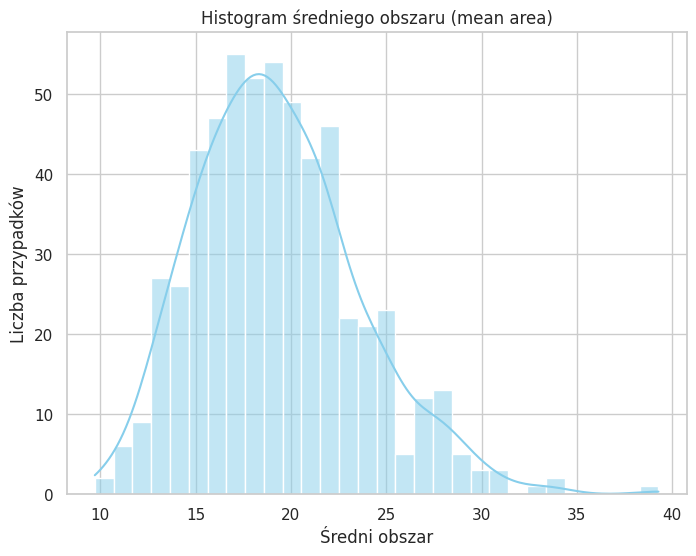

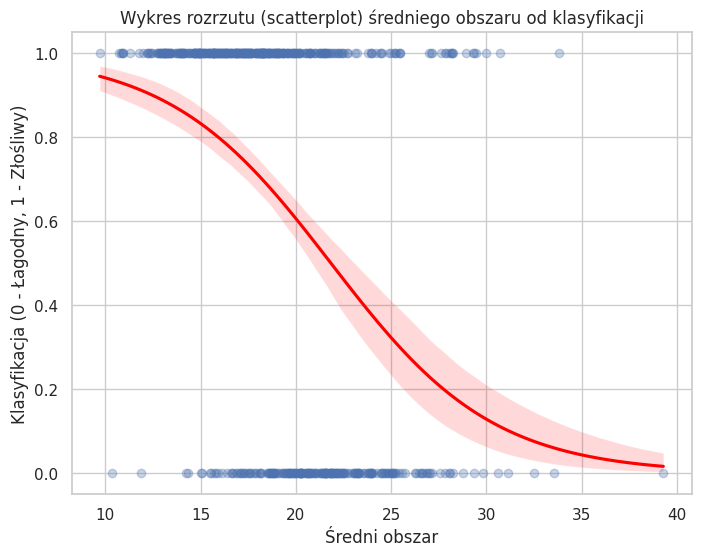

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia stylu wykresu seaborn
sns.set(style="whitegrid")

# Histogram średniego obszaru (mean area)
plt.figure(figsize=(8, 6))
sns.histplot(x[:, 1], bins=30, kde=True, color='skyblue')
plt.title('Histogram średniego obszaru (mean area)')
plt.xlabel('Średni obszar')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji
plt.figure(figsize=(8, 6))
sns.regplot(x=x[:, 1], y=y, logistic=True, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji')
plt.xlabel('Średni obszar')
plt.ylabel('Klasyfikacja (0 - Łagodny, 1 - Złośliwy)')
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Wczytaj dane
data = load_breast_cancer()

# Utwórz DataFrame
tabela = pd.DataFrame(data.data, columns=data.feature_names)

# Dodaj kolumnę z etykietami klas
tabela['target'] = data.target

# Zobacz pierwsze kilka wierszy
print(tabela.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Podział danych na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Budowa modelu regresji logistycznej
model = LogisticRegression()

# Trenowanie modelu na danych treningowych
model.fit(x_train_scaled, y_train)

# Ocena modelu na danych testowych
accuracy = model.score(x_test_scaled, y_test)
print("Dokładność modelu (accuracy):", accuracy)


Dokładność modelu (accuracy): 0.9736842105263158


<function matplotlib.pyplot.show(close=None, block=None)>

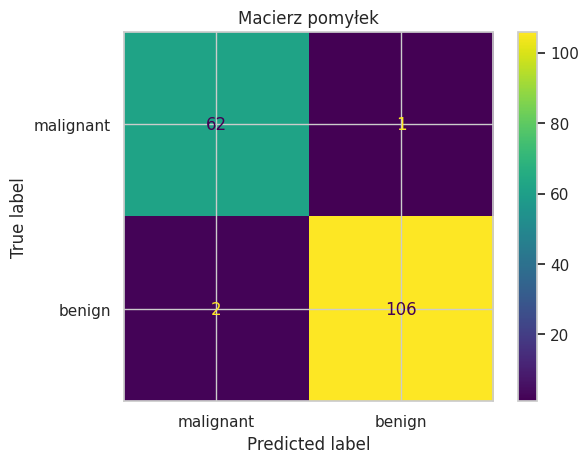

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Załaduj dane
data = load_breast_cancer()
x = data.data
y = data.target

# Standardyzacja danych
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# Podział danych na zestaw uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.3, random_state=42)

# Tworzenie i trenowanie modelu regresji logistycznej
model = LogisticRegression()
model.fit(x_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(x_test)

# Obliczenie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp_cm.plot()
plt.title("Macierz pomyłek")
plt.show

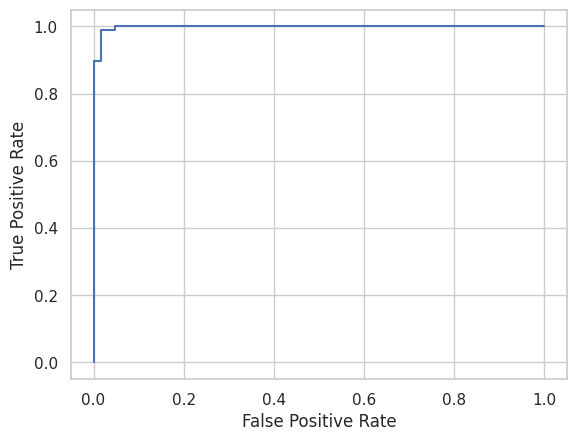

In [31]:
from sklearn.metrics import RocCurveDisplay, roc_curve

# Oblicz wynik decyzyjny dla danych testowych
y_score = model.decision_function(x_test)

# Oblicz krzywą ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
